In [52]:
import pandas as pd
import numpy as np
from collections import Counter

In [53]:
#loading dataset
df = pd.read_csv('spam.csv')

In [54]:
#first glance at the data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
#making dataframe readable
df = df.rename(columns = {'v1':'target','v2':'message'})

In [56]:
#dropping unnecessory columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)

In [57]:
#glance at readable data
df.sample(5)

,target,message
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...
1479,ham,My trip was ok but quite tiring lor. Uni start...
3568,ham,She's fine. Sends her greetings
4013,ham,"Sorry, I can't text &amp; drive coherently, se..."
5457,ham,Arun can u transfr me d amt


In [58]:
#looking at the dataset
df.shape

(5572, 2)

In [59]:

df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [60]:
#renaming spam and ham to 0,1 for classificaiton 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [61]:
#checking for null/empty values
df.isnull().sum()

target     0
message    0
dtype: int64

In [62]:
#checking for duplicates
df.duplicated().sum()

403

In [63]:
#dropping 1 set of duplicates
df = df.drop_duplicates(keep='first')

In [64]:
#looking at cleaned data
df.shape

(5169, 2)

In [65]:
#analysing the data
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6a1370f70>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.4'),
  Text(0.5533635081542612, -0.23192418555038377, '12.6')])

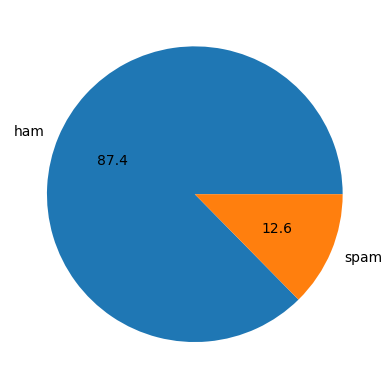

In [67]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels = ['ham','spam'],autopct = "%0.1f")

In [68]:
#we can easily observe that data is imbalanced
!pip install nltk
import nltk
nltk.download('punkt')



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
#breaking message to characters,words and sentences
df['chars'] = df['message'].apply(len)
df['words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sent'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [70]:
df.head()

,target,message,chars,words,sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
#analysing data where message is ham
df[df.target == 0].describe()

,target,chars,words,sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.457263,17.125775,1.800709
std,0.0,56.357463,13.505920,1.278551
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [72]:
#analysing data where message is spam
df[df.target == 1].describe()

,target,chars,words,sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.479326,27.718224,2.973966
std,0.0,30.014336,7.015556,1.487451
min,1.0,13.000000,2.000000,1.000000
25%,1.0,131.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='chars', ylabel='Count'>

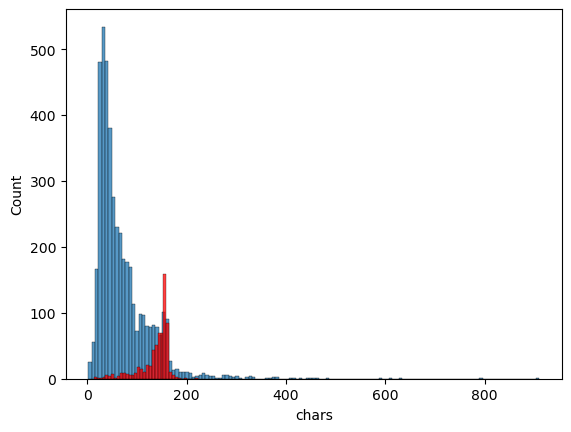

In [73]:
import seaborn as sns
sns.histplot(df[df['target']==0]['chars'])
sns.histplot(df[df['target']==1]['chars'],color = 'red')

<AxesSubplot:xlabel='words', ylabel='Count'>

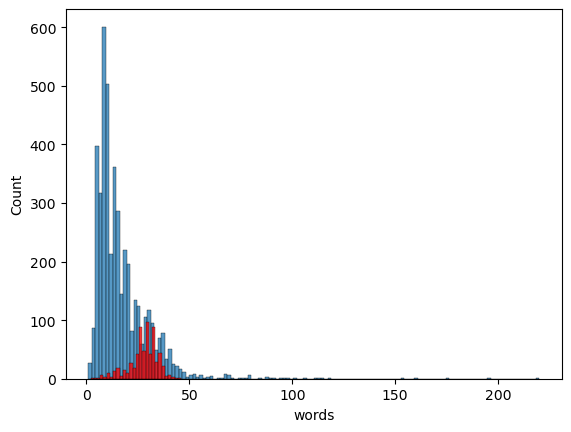

In [74]:
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color = 'red')

<AxesSubplot:>

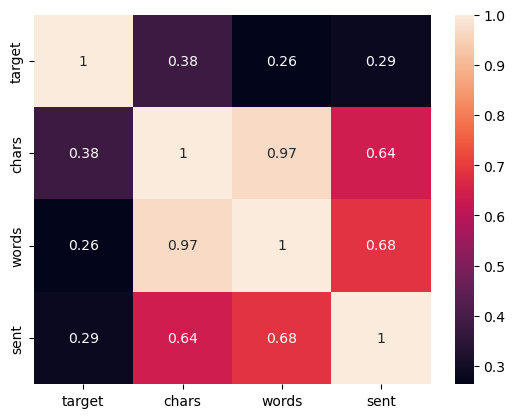

In [75]:
#we can easily observe that on an average, spam messages are longer 
#finding the coorealtion b/w spam, chars,words and sentences
sns.heatmap(df.corr(),annot = True)

In [76]:
#we have to keep only one attribute since they are highly coorelated 
#and we choose characters as it has highest coorelation with target
nltk.download('stopwords')
        from nltk.corpus import stopwords
        from nltk.stem.porter import PorterStemmer
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
#data preprocessing, removing unnecessary characters/words using tokenizing,punctuation, stopwords and stemming
ps = PorterStemmer()
def clean_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    cln = []
    for i in message:
        if i.isalnum():
            cln.append(i)
            
    message = cln[:]
    cln.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            cln.append(i)
    text = cln[:]
    cln.clear()
    for i in message:
        cln.append(ps.stem(i))
            
         
    return " ".join(cln)
            

In [90]:
df['message'] = df['message'].apply(clean_text) 

In [91]:
df.head()

,target,message,chars,words,sent
0,0,go until jurong point crazi avail onli in bugi...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri in 2 a wkli comp to win fa cup fina...,155,37,2
3,0,u dun say so earli hor u c alreadi then say,49,13,1
4,0,nah i do think he goe to usf he live around he...,61,15,1


In [92]:
#creating wordcloud for most used words in spam and ham
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10 , background_color = 'black')
spam = wc.generate(df[df['target']==1]['message'].str.cat(sep=""))

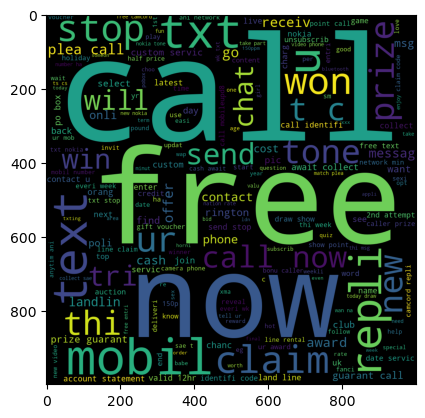

In [94]:
plt.imshow(spam)

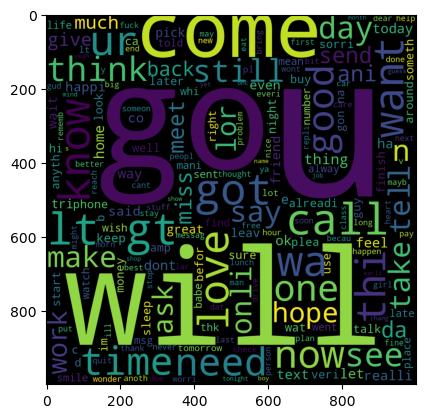

In [95]:
ham = wc.generate(df[df['target']==0]['message'].str.cat(sep=""))
plt.imshow(ham)

In [96]:
#extracting most used words in spam and ham
spam_corpus = []
for msg in df[df['target'] == 1]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [97]:
len(spam_corpus)

14686

In [116]:
from collections import Counter
spam_words = pd.DataFrame(Counter(spam_corpus).most_common(40))
spam_words.head(10)

,0,1
0,to,595
1,a,331
2,call,325
3,you,267
4,your,252
5,free,191
6,for,184
7,the,183
8,now,164
9,or,157


C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'to'),
  Text(1, 0, 'a'),
  Text(2, 0, 'call'),
  Text(3, 0, 'you'),
  Text(4, 0, 'your'),
  Text(5, 0, 'free'),
  Text(6, 0, 'for'),
  Text(7, 0, 'the'),
  Text(8, 0, 'now'),
  Text(9, 0, 'or'),
  Text(10, 0, '2'),
  Text(11, 0, 'is'),
  Text(12, 0, 'txt'),
  Text(13, 0, 'text'),
  Text(14, 0, 'from'),
  Text(15, 0, 'on'),
  Text(16, 0, 'u'),
  Text(17, 0, 'ur'),
  Text(18, 0, 'have'),
  Text(19, 0, 'mobil'),
  Text(20, 0, 'and'),
  Text(21, 0, 'stop'),
  Text(22, 0, 'repli'),
  Text(23, 0, 'claim'),
  Text(24, 0, '4'),
  Text(25, 0, 'with'),
  Text(26, 0, 'prize'),
  Text(27, 0, 'of'),
  Text(28, 0, 'thi'),
  Text(29, 0, 'our'),
  Text(30, 0, 'get'),
  Text(31, 0, 'are'),
  Text(32, 0, 'just'),
  Text(33, 0, 'onli'),
  Text(34, 0, 'new'),
  Text(35, 0, 'servic'),
  Text(36, 0, 'tone'),
  

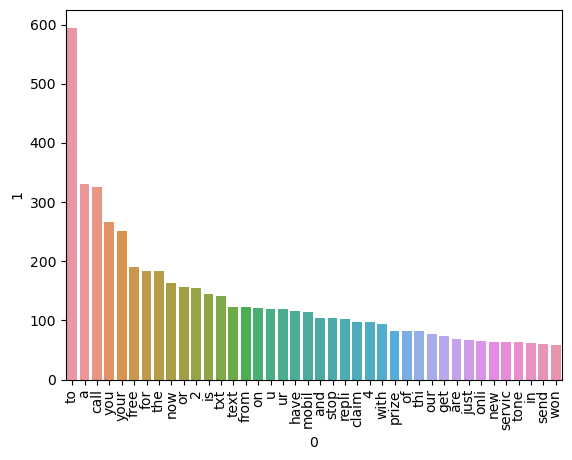

In [118]:
sns.barplot(spam_words[0],spam_words[1])
plt.xticks(rotation = 'vertical')

In [102]:
ham_corpus = []
for msg in df[df['target'] == 0]['message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [119]:
len(ham_corpus)

62871

In [104]:
Counter(ham_corpus).most_common(40)

[('i', 2705),
 ('you', 1867),
 ('to', 1474),
 ('the', 1047),
 ('a', 956),
 ('u', 883),
 ('it', 847),
 ('and', 823),
 ('in', 753),
 ('me', 730),
 ('my', 673),
 ('is', 656),
 ('that', 577),
 ('do', 551),
 ('have', 481),
 ('of', 477),
 ('for', 476),
 ('so', 412),
 ('but', 412),
 ('go', 404),
 ('are', 397),
 ('not', 390),
 ('your', 389),
 ('on', 371),
 ('can', 368),
 ('at', 359),
 ('be', 354),
 ('get', 349),
 ('we', 339),
 ('will', 314),
 ('if', 314),
 ('how', 307),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('up', 283),
 ('just', 277),
 ('now', 275),
 ('come', 275),
 ('what', 269)]

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'i'),
  Text(1, 0, 'you'),
  Text(2, 0, 'to'),
  Text(3, 0, 'the'),
  Text(4, 0, 'a'),
  Text(5, 0, 'u'),
  Text(6, 0, 'it'),
  Text(7, 0, 'and'),
  Text(8, 0, 'in'),
  Text(9, 0, 'me'),
  Text(10, 0, 'my'),
  Text(11, 0, 'is'),
  Text(12, 0, 'that'),
  Text(13, 0, 'do'),
  Text(14, 0, 'have'),
  Text(15, 0, 'of'),
  Text(16, 0, 'for'),
  Text(17, 0, 'so'),
  Text(18, 0, 'but'),
  Text(19, 0, 'go'),
  Text(20, 0, 'are'),
  Text(21, 0, 'not'),
  Text(22, 0, 'your'),
  Text(23, 0, 'on'),
  Text(24, 0, 'can'),
  Text(25, 0, 'at'),
  Text(26, 0, 'be'),
  Text(27, 0, 'get'),
  Text(28, 0, 'we'),
  Text(29, 0, 'will'),
  Text(30, 0, 'if'),
  Text(31, 0, 'how'),
  Text(32, 0, 'gt'),
  Text(33, 0, 'lt'),
  Text(34, 0, '2'),
  Text(35, 0, 'up'),
  Text(36, 0, 'just'),
  Text(37, 0, 'now'),
  Text(38

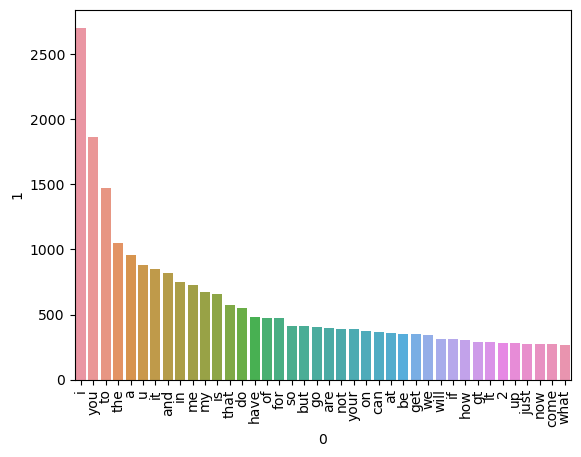

In [120]:
ham_words = pd.DataFrame(Counter(ham_corpus).most_common(40))
sns.barplot(ham_words[0],ham_words[1])
plt.xticks(rotation = 'vertical')

In [391]:
#model building
#using tfid vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [392]:
X = tfidf.fit_transform(df['message']).toarray()

In [393]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [394]:
X.shape

(5169, 6771)

In [395]:
y = df['target'].values

In [404]:
y.shape

(5169,)

In [419]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.3, random_state = 42 )

In [420]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [421]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [422]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [423]:
accuracy_score(y_test,y_pred)

0.9426176660219213

In [424]:
confusion_matrix(y_test,y_pred)

array([[1331,    0],
       [  89,  131]], dtype=int64)

In [425]:
precision_score(y_test,y_pred)

1.0

In [426]:
import pickle

In [427]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("mnbmodel.pkl","wb"))